<a id='top'></a>

# Homework 5: Confidence intervals and other things
***

**Name**: Solutions

***

This assignment is due on Moodle by **5 PM on Friday November 9**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4)

---

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
%matplotlib inline

---

<a id='p1'></a>
[Back to top](#top)

### [30 points] Problem 1 - Sea-level rise, schmee-level rise!

You have been contacted by the local government of Key West, Florida, to assess whether there is statistical evidence for sea-level rise in the area. You obtain from the University of Hawaii Sea Level Center's [gigantic repository of sea-level data](https://uhslc.soest.hawaii.edu/data/?rq) the daily mean sea levels file [linked here](https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jixzm0rl5dp6y4) and below.

In this problem, you will:
1. practice calculating confidence intervals, 
1. practice wrangling a real-life data set into a form where you can actually compute these confidence intervals, because life will rarely be so kind as to simply hand you a nicely packaged and cleaned set of data, and
1. save Key West from a watery fate?

In [4]:
# Local and web paths to the data; pick which works for you.
local_path = "data/sealevel_keywest.csv"
web_path   = "https://raw.githubusercontent.com/dblarremore/csci3022/master/homework/homework5/data/sealevel_keywest.csv"
file_path  = local_path

dfSL = pd.read_csv(file_path, header=None)
dfSL.rename(columns={0 : 'Year', 1 : 'Month', 2 : 'Day', 3 : 'SL'}, inplace=True)
dfSL.head()

,Year,Month,Day,SL
0,1913,1,20,1453
1,1913,1,21,1439
2,1913,1,22,1444
3,1913,1,23,1489
4,1913,1,24,1474


**Part A:**  Write a function `clean_data` to:
1. take in a single argument of a raw sea level data frame (e.g., `dfSL` above),
2. compute the fill-value used to replace missing sea level (SL) data (**not** hard-coded!),
3. use the Pandas `DataFrame.dropna` method to remove all missing rows of data, 
4. select only the data point on the second day of each month, and
4. return a cleaned Pandas data frame.

Use your shiny new function to clean the `dfSL` data frame and save the results in a new data frame.

There is a very specific reason to sample only one daily data point per month. We will talk about it later.

In [5]:
def clean_data(df):
    
    # your code goes here!
    
    # Solution:
    
    dfClean = df.copy()
    
    # compute fill value based on too-low values
    fillVal = dfClean.loc[dfClean["SL"] < -5000, "SL"].median()
    
    # replace missing data with NA
    dfClean.loc[dfClean["SL"]==fillVal, "SL"] = np.nan
    
    # drop missing data
    dfClean.dropna(subset=["SL"], inplace=True)
    
    # grab only the 2nd day of each month
    ind_monthly = dfClean.index[dfClean["Day"]==2]
    dfClean = dfClean.loc[ind_monthly, :]

    return dfClean

dfClean = clean_data(dfSL)
dfClean.head()

,Year,Month,Day,SL
13,1913,2,2,1409.0
41,1913,3,2,1397.0
72,1913,4,2,1402.0
102,1913,5,2,1450.0
133,1913,6,2,1490.0


In [6]:
len(dfClean)

1217

**Part B:**  Plot the cleaned time series of sea levels. Be sure to label your axes, including units. The UHSLC data portal includes a link to the metadata accompanying our data set; if you are not sure about units, that would be a good place to start looking. For the $x$-axis, place the $x$ tick marks on January 2 of each year that is divisible by 10 (i.e., 1920, 1930, ...), and label with that year. You may need to do additional processing in order to grab these indices. 

**Bonus challenge (0 points):**  Why did I choose to work with the second day of each month instead of the first?  You may need to look at the original data set to answer this.

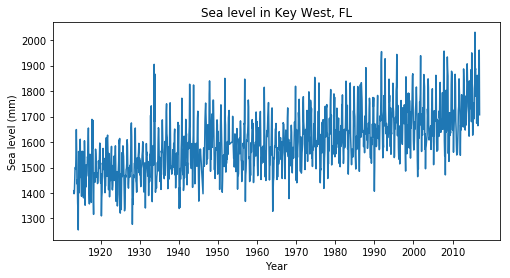

In [7]:
# Solution:

ind_labels = dfClean.index[(dfClean["Month"]==1) & (dfClean["Day"]==2) & (dfClean["Year"]%10==0)]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4))
dfClean["SL"].plot()
ax.set_xticks(ind_labels)
ax.set_xticklabels(dfClean.loc[ind_labels, "Year"])
ax.set_xlabel('Year')
ax.set_ylabel('Sea level (mm)')
ax.set_title('Sea level in Key West, FL');

**Bonus challenge answer:**  I chose to work with the second day of each month because the data point on Jan 1 in 1980 is missing, even though all the others are there:

In [8]:
# Solution:

print("Missing SL on Jan 1 1980:")
print(dfSL.loc[(dfSL["Day"]==1) & (dfSL["Month"]==1) & (dfSL["Year"]%10==0), "SL"])

print("\n")

print("but not missing SL on any Jan 2 of years divisible by 10:")
print(dfSL.loc[(dfSL["Day"]==2) & (dfSL["Month"]==1) & (dfSL["Year"]%10==0), "SL"])

Missing SL on Jan 1 1980:
2537      1485
6190      1467
9842      1475
13495     1614
17147     1641
20800     1420
24452   -32767
28105     1472
31757     1619
35410     1704
Name: SL, dtype: int64


but not missing SL on any Jan 2 of years divisible by 10:
2538     1438
6191     1471
9843     1477
13496    1642
17148    1680
20801    1449
24453    1579
28106    1407
31758    1607
35411    1647
Name: SL, dtype: int64


**Part C:** Use your cleaned sea levels data frame to create two new Pandas data frames or series:
1. one object to contain the sea levels between (and including) the years 1986 and 1995, and
2. another object to contain the sea levels between (and including) the years 2006 and 2015.

Then, create a single-panel figure that includes density histograms of each decade of sea levels. Be sure to label everything appropriately.

Finally, based on the data in front of you, formulate and state a hypothesis about how the mean sea level in the decade 2006-2015 compares to the mean sea level in the decade 1986-1995.

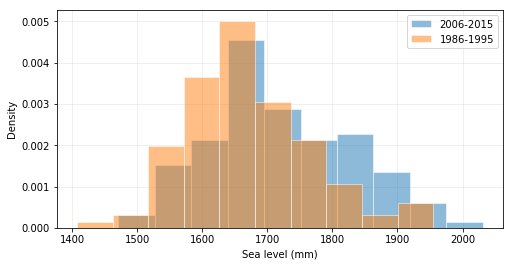

In [10]:
# Solution:

beg1 = 1985
len1 = 10
dfThen = dfClean.copy()
dfThen = dfThen.loc[(dfThen["Year"]>beg1) & (dfThen["Year"]<=(beg1+len1)), "SL"]

beg2 = 2005
len2 = 10
dfNow = dfClean.copy()
dfNow = dfNow.loc[(dfNow["Year"]>beg2) & (dfNow["Year"]<=(beg2+len2)), "SL"]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4))
dfNow.hist(alpha=0.5, edgecolor="white", label="2006-2015", density=True)
dfThen.hist(alpha=0.5, edgecolor="white", label="1986-1995", density=True)
ax.set_xlabel('Sea level (mm)')
ax.set_ylabel('Density')
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
plt.legend()
plt.show()

**Solution:**

By golly, it sure looks like the mean sea level around 2010 is higher than the mean sea level around 1990!

**Part D:** Compute a 99.9% confidence interval for each of (1) the mean sea level in the 1986-1995 decade ($\mu_{1986-1995}$) and (2) the mean sea level in the 2006-2015 decade ($\mu_{2006-2015}$).  You may use Python for arithmetic operations and executing the calculations, but the relevant steps/set-up should be displayed in Markdown/MathJax.

Based on these two confidence intervals, do you think there is sufficient evidence to conclude that there is or is not a significant difference in the mean sea level between 1986-1995 and 2006-2015? Justify your answer. 

**Solution:**

First, a 99.9% confidence interval ($\alpha=0.001$) for $\mu$ looks like: $\bar{x} \pm z_{\alpha/2} \dfrac{s}{\sqrt{n}}$

So let's print out some quantities relevant to our by-hand calculation:

In [11]:
stats.norm.ppf(1-.001/2)

3.2905267314919255

In [12]:
print(np.sqrt(dfThen.var(ddof=1)))
print(dfThen.count())
print(dfThen.mean())
print(stats.norm.ppf(1-.001/2)*dfThen.std(ddof=1)/np.sqrt(dfThen.count()))

98.50603893103383
120
1670.575
29.589502009226074


In [13]:
print(np.sqrt(dfNow.var(ddof=1)))
print(dfNow.count())
print(dfNow.mean())
print(stats.norm.ppf(1-.001/2)*dfNow.std(ddof=1)/np.sqrt(dfNow.count()))

109.82938449427824
118
1720.677966101695
33.26924684471803


Now then.

99.9% confidence interval for $\mu_{1986}$ is 

$\begin{align}
  CI &= \bar{x}_{1986} \pm z_{0.001/2} \dfrac{s_{1986}}{\sqrt{n_{1986}}} \\
     &= 1670.575 \pm 3.291 \dfrac{98.506}{\sqrt{120}} \\
     &= 1670.575 \pm 29.590 \\
     &= [1640.985, ~1700.165]
\end{align}$

And a 99.9% confidence interval for $\mu_{2006}$ is 

$\begin{align}
  CI &= \bar{x}_{2006} \pm z_{0.001/2} \dfrac{s_{2006}}{\sqrt{n_{2006}}} \\
     &= 1720.678 \pm 3.291 \dfrac{109.829}{\sqrt{118}} \\
     &= 1720.678 \pm 33.269 \\
     &= [1687.409, ~1753.947]
\end{align}$

Executing these calculations in Python, we have:

In [14]:
alp = 0.001
zcrit = stats.norm.ppf(1-alp/2)

print('1985-1995 Confidence interval:')
SE_1986 = dfThen.std(ddof=1)/np.sqrt(dfThen.count())
xbar = dfThen.mean()
CI_1986 = (xbar - zcrit*SE_1986, xbar + zcrit*SE_1986)
print("CI = [{:.3f}, {:.3f}]".format(CI_1986[0], CI_1986[1]))

print('\n2006-2015 Confidence interval:')
SE_2006 = dfNow.std(ddof=1)/np.sqrt(dfNow.count())
xbar = dfNow.mean()
CI_2006 = (xbar - zcrit*SE_2006, xbar + zcrit*SE_2006)
print("CI = [{:.3f}, {:.3f}]".format(CI_2006[0], CI_2006[1]))

1985-1995 Confidence interval:
CI = [1640.985, 1700.165]

2006-2015 Confidence interval:
CI = [1687.409, 1753.947]


The 99.9% confidence intervals are overlapping, so we are *tempted* to say that there is NOT sufficient evidence that there is any statistically significant difference... BUT that isn't what a confidence interval is saying!

Our confidence intervals, at the more coarse interpretation, are saying that we are 99.9% confident that the mean sea level in the period 1986-1995 is between about 1640 and 1700 mm, and that the mean between 2006-2015 is between about 1687 and 1754 mm.  Just because these intervals overlap does not mean the *means* are statistically indistinguishable.

**Conclusion:** this result tells us nothing about how these two means compare.

**Part E:**  Compute a 99.9% confidence interval for the ***difference in mean sea level*** between the 2006-2015 and the 1986-1995 decades ($\mu_{2006-2015} - \mu_{1986-1995}$. Based on this, make a conclusion regarding your hypothesis from **Part C**, and compare to what your results in **Part D** implied. You may use Python for arithmetic operations and executing the calculations, but the relevant steps/set-up should be displayed in Markdown/MathJax.

**Solution**:

A 99.9% confidence interval for $\mu_{2006} - \mu_{1986}$ is given by:

$\begin{align}
  CI &= \bar{x}_{2006} - \bar{x}_{1986} \pm z_{0.001/2} \sqrt{\dfrac{s_{2006}^2}{n_{2006}} + \dfrac{s_{1986}^2}{n_{1986}}} \\
     &= 1720.678 - 1670.575 \pm 3.291 \sqrt{\dfrac{109.829^2}{118} + \dfrac{90.506^2}{120}} \\
     &= 50.103 \pm 44.524 \\
     &= [5.579, ~94.627]
\end{align}$

In [15]:
print('Difference in means Confidence Interval')
SE_diff = np.sqrt((dfNow.var(ddof=1)/dfNow.count()) + (dfThen.var(ddof=1)/dfThen.count()))
xbar = dfNow.mean()-dfThen.mean()
lb = xbar - zcrit*SE_diff
ub = xbar + zcrit*SE_diff
print("CI = [{:0.3f}, {:0.3f}]".format(lb,ub))

Difference in means Confidence Interval
CI = [5.579, 94.627]


Ah! Now we are testing for the proper thing, whether or not a 99.9% confidence interval for the difference in means covers 0.  And it does not, which suggests that at the 99.9% confidence level, there **is** a statistically significant difference in the means.

**Part F:**  The confidence intervals from **Parts D** and **E** were derived using the Central Limit Theorem.  Which assumption of the Central Limit Theorem would likely be violated if we took more than one measurement per month to form our samples, and why?

**Solution:**

The easiest hole to poke would be that there is a clear **trend** in the sea levels as a function of time. So, the measurements are not going to be identically distributed, since this distribution is at the very least changing mean as a function of time.

A little bit less obviously, especially without a physical science background, there is a **tidal cycle** each month (~28 days), so measurements within one month of each other are likely **not independent**, which would violate one of the key assumptions of the CLT.

---

<a id='p2'></a>
[Back to top](#top)

### [25 points] Problem 2 - Quality of Red vs White Wine 

**Part A:** Load the data in [`winequalityred.csv`](https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jixzm1ebc6q6ye) and [`winequalitywhite.csv`](https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jixzm17x9pu6y9) into Pandas DataFrames.  They are available under Resources on Piazza, and linked here and below.  A description of this dataset can be found on [UC Irvine's Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wine+Quality). The quantity of interest for this problem is the quality of the wine.

Are we justified in using the Central Limit Theorem in our analysis of estimates of the mean and proportions of the data?  Justify your response. 

In [20]:
# read either local or web file version; pick whichever works for you
local_file_white = "data/winequality-white.csv"
local_file_red   = "data/winequality-red.csv"
web_file_white = "https://raw.githubusercontent.com/dblarremore/csci3022/master/homework/homework5/data/winequality-white.csv"
web_file_red   = "https://raw.githubusercontent.com/dblarremore/csci3022/master/homework/homework5/data/winequality-red.csv"

dfRed   = pd.read_csv(local_file_red, delimiter=';')
dfWhite = pd.read_csv(local_file_white, delimiter=';')

dfRed.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [21]:
print("The number of red wine entries is {} and the number of white wine entries is {}".format(len(dfRed),len(dfWhite)))

The number of red wine entries is 1599 and the number of white wine entries is 4898


**Solution**: Yes, because there are $m=1599$ samples of red wine and $n=4898$ samples of white wine. These are more than sufficient to satisfy the sample size requirements of the Central Limit Theorem. 

**Part B:** Let $X$ be a random variable denoting the quality of a bottle of wine, and let $C$ be a random variable denoting its color (either red ($r$) or white ($w$)). For the remainder of this problem, we are concerned with probabilities such as "If I buy a random bottle of red wine, what is the probability that its quality is at least a 7?". We could write that probability as $P(X \geq 7 \mid C=r)$, for example, and consider it the ***proportion*** of the population of red wines that are at least a 7 in quality. Calculate and report estimates of $P(X \geq 7 \mid C=r)$ and $P(X \geq 7 \mid C=w)$.

Obtain 95% confidence intervals for the proportion of red and white wines that are **at least** a 7 in quality (obtain one CI for each color).  Based on your results, if you are interested in buying many high quality bottles of wine but are buying totally at random, is one color a better bet than the other? Fully justify your answer.

Calculations may be executed in Python, but you need to set up your work (*what* it is you are calculating) in Markdown/MathJax.

**Solution:**

A $100\cdot(1-\alpha)$% confidence interval for $\hat{p}$, the proportion of either red or white wine that is a 7 or higher quality, is given by:

$$
\hat{p} \pm z_{\alpha/2} ~ \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}
$$

where $n$ is the number of observations and $z_{\alpha/2} = z_{0.05/2} = z_{0.025} = $ `stats.norm.ppf(1-0.025)` $=1.96$

In [22]:
stats.norm.ppf(0.975)

1.959963984540054

In [23]:
cutoff = 7
phat_red = dfRed.loc[dfRed["quality"]>=cutoff, "quality"].count()/dfRed["quality"].count()
phat_white = dfWhite.loc[dfWhite["quality"]>=cutoff, "quality"].count()/dfWhite["quality"].count()
print("p-hat(red) = {:0.3f}, and p-hat(white) = {:0.3f}".format(phat_red, phat_white))

alp = 0.05
zcrit = stats.norm.ppf(1-alp/2)
SE_red = np.sqrt(phat_red*(1-phat_red)/len(dfRed))
SE_white = np.sqrt(phat_white*(1-phat_white)/len(dfWhite))
CI_red = [phat_red - zcrit*SE_red, phat_red + zcrit*SE_red]
CI_white = [phat_white - zcrit*SE_white, phat_white + zcrit*SE_white]
print("CI for red:   {:0.3f} \u00b1 {:0.3f}, [{:0.3f}, {:0.3f}]".format(phat_red, SE_red, CI_red[0], CI_red[1]))
print("CI for white: {:0.3f} \u00b1 {:0.3f}, [{:0.3f}, {:0.3f}]".format(phat_white, SE_white, CI_white[0], CI_white[1]))

p-hat(red) = 0.136, and p-hat(white) = 0.216
CI for red:   0.136 ± 0.009, [0.119, 0.152]
CI for white: 0.216 ± 0.006, [0.205, 0.228]


It would appear that we are better off buying white wine, because its confidence interval for the probability of the proportion of white wines with quality at least 7 is completely higher and non-overlapping with the confidence interval for the proportion of red wines with quality at least 7.

**Part C:** Now, as college students (and teachers), we might not be super concerned with buying a really high quality bottle of wine.  Let's focus instead on making sure we do *not* buy a really disgusting bottle of wine.  Calculate and report estimates of $P(X \geq 5 \mid C=r)$ and $P(X \geq 5 \mid C=w)$.

Obtain 95% confidence intervals for the proportion of red and white wines that are **at least** a 5 in quality, that is, $P(X \geq 5 \mid C)$.  Based on your results - and what you saw in Problem 1 - if you are interested in buying bottles of wine that are at least a 5 in quality, but are again buying wine totally randomly, can you conclude that you are better off buying one color over the other? Fully justify your answer.

In [24]:
# Solution:

cutoff = 5
phat_red = dfRed.loc[dfRed["quality"]>=cutoff, "quality"].count()/dfRed["quality"].count()
phat_white = dfWhite.loc[dfWhite["quality"]>=cutoff, "quality"].count()/dfWhite["quality"].count()
print(phat_red, phat_white)

alp = 0.05
zcrit = stats.norm.ppf(1-alp/2)
SE_red = np.sqrt(phat_red*(1-phat_red)/len(dfRed))
SE_white = np.sqrt(phat_white*(1-phat_white)/len(dfWhite))
CI_red = [phat_red - zcrit*SE_red, phat_red + zcrit*SE_red]
CI_white = [phat_white - zcrit*SE_white, phat_white + zcrit*SE_white]
print("CI for red:   {:0.3f} \u00b1 {:0.3f}, [{:0.3f}, {:0.3f}]".format(phat_red, zcrit*SE_red, CI_red[0], CI_red[1]))
print("CI for white: {:0.3f} \u00b1 {:0.3f}, [{:0.3f}, {:0.3f}]".format(phat_white, zcrit*SE_white, CI_white[0], CI_white[1]))

0.9606003752345216 0.9626378113515721
CI for red:   0.961 ± 0.010, [0.951, 0.970]
CI for white: 0.963 ± 0.005, [0.957, 0.968]


These confidence intervals are quite overlapping, but we cannot conclude that there is no significant difference. We are **not** testing the correct thing! So let's do Part D, where we actually do test the correct thing...

**Part D:** Compute a 95% confidence interval for the difference in proportions of red and white wines that are at least a 5 in quality. 

Now, based on your results for this part, can you conclude that you are better off buying one color over the other? Fully justify your answer. How does your work here differ from your work in **Part C**?

**Solution:**

Two-sample CI...
$$
\hat{p}_w - \hat{p}_r \pm z_{\alpha/2} ~ \sqrt{\frac{\hat{p}_w(1-\hat{p}_w)}{n_w} + \frac{\hat{p}_r(1-\hat{p}_r)}{n_r}}
$$

In [25]:
cutoff = 5
phat_red = dfRed.loc[dfRed["quality"]>=cutoff, "quality"].count()/dfRed["quality"].count()
phat_white = dfWhite.loc[dfWhite["quality"]>=cutoff, "quality"].count()/dfWhite["quality"].count()
print(phat_red, phat_white)

alp = 0.05
zcrit = stats.norm.ppf(1-alp/2)
SE_red = np.sqrt(phat_red*(1-phat_red)/len(dfRed))
SE_white = np.sqrt(phat_white*(1-phat_white)/len(dfWhite))
SE =  np.sqrt(SE_red**2 + SE_white**2)
dphat = phat_white - phat_red
CI = [dphat - zcrit*SE, dphat+zcrit*SE]
print(CI)

0.9606003752345216 0.9626378113515721
[-0.008877364097359978, 0.012952236331461057]


Here, we find that the 95% confidence interval for the difference in proportions *does* contain 0, which indicates that there is insufficient evidence to conclude there is any difference in the population proportions of red/white wines that are at least a 5 in quality.

This is different from Part C in that we are actually able to draw conclusions here!

**Part E:**  Now, we have many more observations of white wines than red. This certainly contributes to the width of the 95% confidence interval for the proportion of red wines that are at least a 5 in quality, which you should have found in **Part C** to be wider than the corresponding confidence interval for white wines. 

How large would our sample size of red wines need to be in order to guarantee that this 95% confidence interval width is at most 0.01? Note that we are hypothetically adding more samples, so we do not know the precise value of $\hat{p}$.

**Solution:**

We do not know $\hat{p}$, but we do know that $\hat{p}(1-\hat{p}) \leq \dfrac{1}{2}\left(1-\dfrac{1}{2}\right) = \dfrac{1}{4}$.

So we set:

$\begin{align}
  \text{CI width} &= 2z_{\alpha/2}\sqrt{\dfrac{\hat{p}(1-\hat{p})}{n}} \stackrel{\heartsuit}{\leq} 0.01 \\
  &\Rightarrow~~ \dfrac{2z_{0.025} \sqrt{\hat{p}(1-\hat{p})}}{0.01} \leq \dfrac{2z_{0.025} \sqrt{\frac{1}{4}}}{0.01} \leq \sqrt{n} \\
  &\Rightarrow~~ \dfrac{4z_{0.025}^2 \frac{1}{4}}{0.0001} \leq n \\
  &\Rightarrow~~ \dfrac{z_{0.025}^2}{0.0001} \leq n \\
  &\Rightarrow~~ \dfrac{1.96^2}{0.0001} \leq n \\
  &\Rightarrow~~ 38,416 \leq n \\
 \end{align}$
 
So to **guarantee** that the 95% confidence interval for the proportion of red wines that are at least a 5 in quality has a width of at most 0.01, we need a sample size of about 38,000 wines. Oh my!

---

<a id='p3'></a>
[Back to top](#top)

### [30 points] Problem 3 - Exploring Confidence Intervals 

The [Gumbel](https://en.wikipedia.org/wiki/Gumbel_distribution) distribution is one of several distributions frequently used to model environmental extremes (for example, extreme temperatures and sea levels).  It is also fairly asymmetric, and thus interesting for investigating confidence intervals.  It is implemented in scipy.stats as [gumbel_r](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gumbel_r.html), where the appendix "\_r" denotes the right-skewed version of the Gumbel distribution (as opposed to the left-skewed).

**Part A**: Complete the following code cell to plot a histogram of 100 realizations from the Gumbel distribution with parameters $\mu=8$ and $\beta=2$.  Be sure to leave this cell executed before turning in your assignment! Make your histogram grey with gold edges.

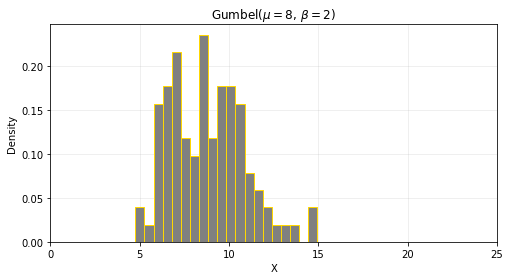

In [55]:
mu = 8
beta = 2
n_sample = 100
x = stats.gumbel_r.rvs(loc=mu, scale=beta, size=n_sample)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4))
plt.hist(x, color="grey",edgecolor="gold", bins=20, density=True)
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.set_xlabel('X')
ax.set_ylabel('Density')
ax.set_title(r'Gumbel($\mu=${}, $\beta=${})'.format(mu,beta))
plt.xlim([0,25])
plt.show()

**Part B:** Look up the analytical mean and variance of the Gumbel distribution with parameters $\mu=8$ and $\beta=2$ and calculate them here by hand.  Note that the Euler–Mascheroni constant can be accessed via `np.euler_gamma`. 

Use the empirical mean from your sample in **Part A**, and the true variance of the Gumbel distribution to compute by hand a 95% confidence interval for the mean.

**Solution:**

If $X \sim Gum(\mu=8, \beta=2)$ then the theoretical mean and variance are:

$$E[X] = \mu+\beta \gamma = 8+2\cdot 0.5772 = 9.154$$

and 

$$\textrm{Var}(X) = \dfrac{\pi^2}{6}\beta^2 = \dfrac{\pi^2}{6}(2^2) = 6.580$$

The empirical mean from **Part A** is $\bar{X} = 9.314$, and a 95% confidence interval would be $\bar{X} \pm z_{0.05/2} \sqrt{\dfrac{\textrm{Var}(X)}{n}}$, where:
* $n=100$
* $\textrm{Var}(X)=6.580$
* $z_{0.05/2} = $ `stats.norm.ppf(0.975) `$=1.96$

This gives:

$$\begin{align}
  \textrm{CI} &= \left[9.314 - 1.96\sqrt{\dfrac{6.580}{100}}, ~~ 9.314+1.96\sqrt{\dfrac{6.580}{100}}\right]\\
              &= [8.81, ~~ 9.82] \\
\end{align}$$

In [28]:
print(np.euler_gamma)

0.5772156649015329


In [29]:
xbar_empirical = np.mean(x)
xbar_theoretical = mu + beta*np.euler_gamma
var_empirical = np.var(x, ddof=1)
var_theoretical = (np.pi*beta)**2/6
print("Empirical mean = {:0.3f}, Theoretical mean = {:0.3f}".format(xbar_empirical, xbar_theoretical))
print("Empirical variance = {:0.3f}, Theoretical variance = {:0.3f}".format(var_empirical, var_theoretical))

Empirical mean = 8.576, Theoretical mean = 9.154
Empirical variance = 3.804, Theoretical variance = 6.580


**Part C:  A theoretical interlude.** When Stella O'Flaherty (the famous octopus) ran her solution code for **Part B**, she obtained a 95% confidence interval of $[8.81, 9.82]$ for the mean of the $Gum(\mu=8, \beta=2)$ distribution. For each of the following, explain why or why not the situation described is correct, given the technical definition of a 95% confidence interval we went over in class.

**(i)** If you had no other evidence regarding true mean of the $Gum(\mu=8, \beta=2)$ distribution, you could say there is a 95% chance that its true mean falls between 8.81 and 9.82.

**(ii)** If a class of 100 students all construct 95% confidence intervals for the mean of the $Gum(\mu=8, \beta=2)$ distribution, then we expect about 95 of their CIs to contain the true mean, and about 5 of them to miss the true mean.

**(iii)** There is a 95% probability that any given random variable sampled from $Gum(\mu=8, \beta=2)$ will be between 8.81 and 9.82.

**Solutions:**

**(i)** FALSE -- the confidence level is **not** a statement about any particular interval, and this incorrect statement is saying there is something special about the particular CI that I found.  There is not.

**(ii)** TRUE -- this is exactly the definition of a 95% confidence interval, that if you cook up a bunch of 95% confidence intervals, you expect them to actually capture the mean about 95% of the time.

**(iii)** FALSE -- confidence intervals are about sampling for the **mean** of a distribution, not any particular element from the population, and there is nothing special about the confidence interval here.  This one is doubly wrong!

**Part D:** In this part you'll write a function to investigate the _coverage properties_ of a confidence interval for the mean of the Gumbel distribution. Complete the following function to randomly sample $m=500$ sample means with sample size $n=100$ for the Gumbel distribution with parameters $\mu=8$ and $\beta=2$.  For each random sample, compute the 66% confidence interval for the mean. Note that you actually know that the variance for the true population distribution is, $\sigma^2$.  Your function should do two things: 

1. Report the proportion of confidence intervals that successfully cover the true mean of the distribution 
2. Make a plot of 50 randomly selected confidence intervals. Overlay the intervals on the line $y=\textrm{True mean}$ (from **Part B**). Color confidence intervals black if they cover the true mean, and red if they don't.  

Be sure to leave this cell executed before turning in your assignment!

proportion covering mean: 0.674


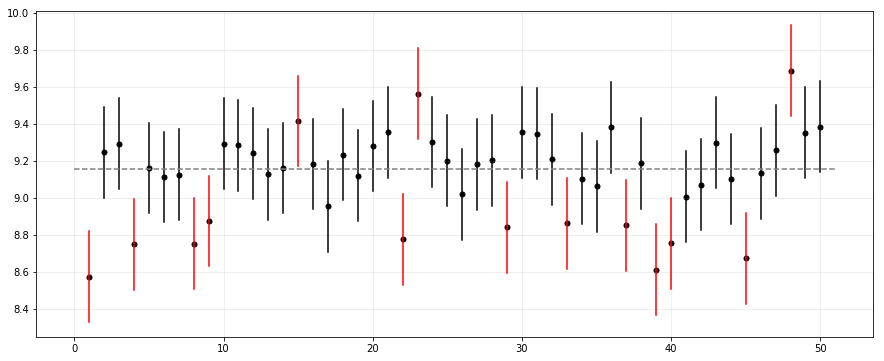

In [60]:
def confidence_intervals(m=500, n=100):
    mu = 8
    beta = 2
    EX = mu+beta*np.euler_gamma
    VX = (np.pi*beta)**2/6
    CIs = np.zeros((m,2))
    zcrit = stats.norm.ppf(1-(1-0.66)/2)
    SE = np.sqrt(VX/n)
    ctr = 0
    for ii in range(m):
        x = stats.gumbel_r.rvs(loc=mu, scale=beta, size=n)
        xbar = np.mean(x) 
        L, U = xbar - zcrit*SE, xbar + zcrit*SE
        CIs[ii,0] = L 
        CIs[ii,1] = U 
        ctr += 1 if (L <= EX) and (EX <= U) else 0 
        
    print("proportion covering mean: {:.3f}".format(ctr/m))
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,6))
    for ii, row in enumerate(np.random.choice(range(m), size=50, replace=False)):
        L, U = CIs[row,:]
        color = "black" if (L <= EX) and (EX <= U) else "red" 
        plt.plot([ii+1, ii+1], [U, L], color=color)
        plt.scatter([ii+1], (U+L)/2, s=25, color="k")
    plt.plot([0, 51], [EX, EX], color="gray", ls="--")
    ax.grid(alpha=0.25)
    
confidence_intervals()

**Part E:** Does the proportion of confidence intervals that cover the true mean of the distribution agree with the theory described in class?  Justify your conclusion. 

**Solution:**

A 66% confidence interval for the mean constructed in the above manner should cover the true mean of the population 66% of the time.  In the experiment above we see that for $m=500$ independently created confidence intervals the 66% confidence intervals covered the mean 67.4% of the time, which is pretty darn good!

---

<a id='p4'></a>
[Back to top](#top)

### [15 points] Problem 4 - Freethrows
***

Keep your skills sharp by answering these straightforward questions.

**Part A**: <font color='green'>You are driving through the paint toward the basket when Steph Curry fouls you. You step to the line to sink this freethrow shot, which is delivered in the form of a CSCI3022 problem:</font>

You have a shuffled deck of cards. It includes the usual 52 cards AND three special additional Octopus cards. You flip over the cards one by one, without replacing them in the deck. You count how many cards you'll have to flip until you flip over the second Octopus.  You repeat this many times. Simulate this process. Plot a histogram with binsize=1 of the outcomes, in lightgrey with white outline. Compute the mean, median, and mode for this dataset, indicate them on the plot too, using linstyles of green dashed, pink dotted, and black solid, respectively. Look up how to do a legend in MatPlotLib, and label your histogram, mean, median.
***

In [6]:
def twoOctopusSim(n_trials = 1000000):
    results = np.zeros(n_trials,dtype=int)
    for ii in range(n_trials):
        deck = np.array([0]*52+[1]*3)
        np.random.shuffle(deck)
        octos = deck==1
        results[ii] = np.where(np.cumsum(octos)==2)[0][0]
    return results

x = twoOctopusSim()
print("Mean: {:.3f}".format(np.mean(x)))
print("Median: {}".format(np.median(x)))
print("Mode: {}".format(stats.mode(x,axis=None).mode[0]))

Mean: 26.995
Median: 27.0
Mode: 29


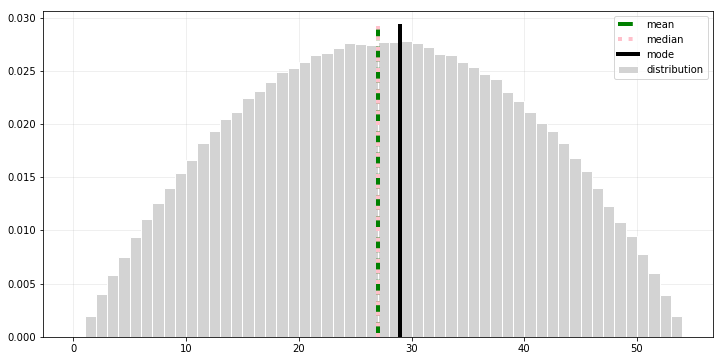

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
pd.Series(x).hist(ax=ax, color="lightgrey", edgecolor="white", bins=np.arange(55), normed=True,label="distribution")
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
yl = ax.get_ylim()
ax.plot(np.mean(x)*np.ones(2),yl,'--',c='g',zorder=2,lw=4,label="mean")
ax.plot(np.median(x)*np.ones(2),yl,':',c='pink',zorder=2,lw=4,label="median")
ax.plot(stats.mode(x,axis=None).mode[0]*np.ones(2),yl,c='black',zorder=2,lw=4,label="mode")
ax.legend()

**Part B**: <font color='green'>You sink your first free throw and immediately get dap from your teammates, Oscar O'Flaherty and Octavia O'Flaherty. You prepare to take another shot, which—and you're not going to believe this—is another CSCI3022 problem:</font>

In general, which is wider: a 95% confidence interval or a 99% confidence interval? How would you explain this to your younger sibling, who is not a statistician?
***

A 99% confidence interval is wider. Remember that a 99% confidence interval will have the true mean in it 99% of the time, but a 95% confidence interval will have the true mean in it only 95% of the time. That means that the 95% confidence interval hast got to be smaller, since it misses the mean more often. This is why, my dear sibling, the goalie's hockey stick is bigger than everyone else's. When something is bigger it's going to catch more stuff.

**Part C**: <font color='green'>The crowd is silent. Everything is slow motion. You're literally in the air, releasing what looks to be a perfect shot to tie the match. As you release the ball, a hand appears to block it. It is Kevin Durant. :( 

Luckily, his fingertips also brush against your arm. That's a foul, and everyone saw it. Back to the line. Back to CSCI3022:</font>

Let $X$ be a normally-distributed random variable. You draw from it and get these values, stored in the numpy array **durant**, below. Compute a 95% confidence interval for the _standard deviation_.
***

In [58]:
durant = np.array([3.7778,3.9459,3.8248,4.1111,4.0180,4.0898,4.0380,3.9273,3.9614,3.8387])

In [66]:
# CI = sqrt( n-1   S^2 / X^2 a/2 n-1 )   , sqrt( n-1   S^2 / X^2 1-a/2 n-1 ) 
n = len(durant)
dof = n-1
sample_var = np.var(durant,ddof=1)
alpha = 0.05;
L = np.sqrt((n-1)*sample_var/stats.chi2.ppf(1-alpha/2,dof))
U = np.sqrt((n-1)*sample_var/stats.chi2.ppf(alpha/2,dof))
print("CI: [{:.3f},{:.3f}]".format(L,U))
print("Sample StDev: {:.3f}".format(np.sqrt(sample_var)))

CI: [0.078,0.207]
Sample StDev: 0.114


**Part D**: <font color='green'>"Draymond Green has it all, in spite of living in the Bay Area," you think to yourself. "But he doesn't have this shot..." You're all over him, and he's going to have to pass. You can see the irritation in his eyes. Then you realize that it's not irritation, and he's not being distracted by your superb defense. He's being distracted by this CSCI3022 problem:</font>

If you're doing quality control for the average strength of carbon fiber that will be used in airplane construction, and your alternative hypothesis is that the strength of the carbon is below tolerance, and therefore unsafe, would you rather have a low Type I error rate or a low Type II error rate? Explain.

***

If our alternative hypothesis is that the carbon is too weak, and therefore unsafe, then we want to err on the side of rejection. After all, these are airplanes!! Therefore, we really want to AVOID FALSE NEGATIVES. No bad stuff should get through. If we scrap some good stuff (false positives) then that's just the price we'll have to pay. 

Therefore, we would rather have a LOW TYPE II ERROR RATE.

**Part E**: <font color='green'>You are watching tape footage at halftime with your personal trainer, Stella O'Flaherty. You gotta focus up if you're going to match Klay Thompson's speed in the second half. You take a sip of Gatorade and Dr. O'Flaherty suggests that you do the following CSCI3022 problem:</font>

You measure 53 suckers from baby reef octopuses and find that they are, on average, 45.2 mm wide, with a standard devaition of 30.4mm. 

Then you measure 41 suckers from from baby dumbo octopuses and find that they are, on average, 52.8 mm wide, with a standard deviation of 22.8 mm. 

Is there statistical evidence at the 0.05 significance level that the true mean of baby dumbo octopus sucker width exceeds the true mean of baby reef octopus sucker width by more than 6 mm?  Use a test of your choice.

***

Let's start with our null and alternative hypotheses:

$$H_0 : \mu_\text{dumbo} - \mu_\text{reef} = 3$$
$$H_1 : \mu_\text{dumbo} - \mu_\text{reef} > 3$$

If we assume the null hypothesis (which we do when we're going to do hypothesis testing) then $\mu_\text{dumbo} - \mu_\text{reef}=3$. 

The CLT tells us that

$$ \bar{x}_\text{dumbo} - \bar{x}_\text{reef} \sim N \left( \mu_\text{dumbo} - \mu_\text{reef}, \frac{\sigma_\text{dumbo}^2}{m} + \frac{\sigma_\text{reef}^2}{n}  \right ) $$

Assuming $H_0$ and applying Box-Muller means that

$$ \frac{\bar{x}_\text{dumbo} - \bar{x}_\text{reef} - 6}{\sqrt{\frac{\sigma_\text{dumbo}^2}{m} + \frac{\sigma_\text{reef}^2}{n}}} \sim Z$$

This allows us to plug in and compute our test statistic
$$ \frac{52.8 - 45.2 - 6}{\sqrt{\frac{22.8^2}{41} + \frac{30.4^2}{53}}} = z$$

In [26]:
numerator = 52.8-45.2-6
denominator = np.sqrt(22.8*22.8/41 + 30.4*30.4/53)
z = numerator/denominator
print("z={:.4f}".format(z))

z=0.2916


We can now decide whether to do a rejection region test or a p-value test. Here are both.

In [27]:
# rejection region test
z_crit = stats.norm.ppf(0.95)
print("z_crit = {:.4}".format(z_crit))

z_crit = 1.645


Since $z < z_{crit}$, we fail to reject the null hypothesis. 

In [28]:
# p-value test
p = 1-stats.norm.cdf(z)
print("p-value = {:.4f}".format(p))

p-value = 0.3853


Since $p > 0.05$, we fail to reject the null hypothesis.